In [64]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [45]:
df = sns.load_dataset('iris')

In [48]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [51]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [53]:
df["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [55]:
df["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [56]:
versicolor_petal_length = df[df["species"] == "versicolor"]["petal_length"]

In [57]:
versicolor_petal_length.describe()

count    50.000000
mean      4.260000
std       0.469911
min       3.000000
25%       4.000000
50%       4.350000
75%       4.600000
max       5.100000
Name: petal_length, dtype: float64

In [60]:
_ = plt.hist(versicolor_petal_length)
_ = plt.xlabel("petal length (cm)")
_ = plt.ylabel("count")

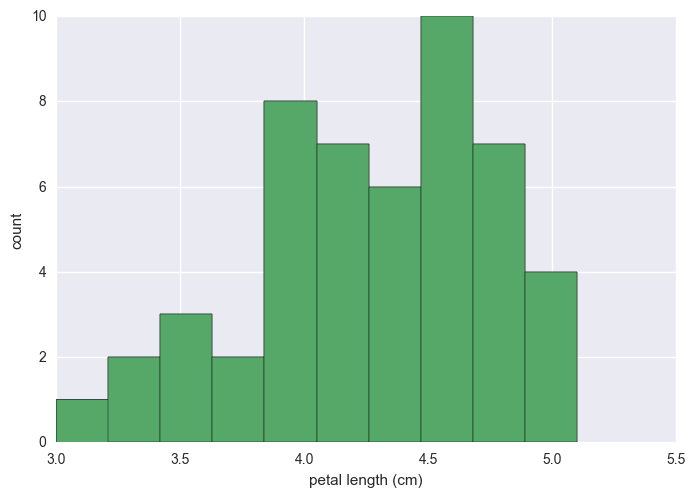

In [61]:
plt.show()

In [75]:
np.sum(df["petal_length"] == 3.5)

2

In [76]:
np.sum(df["petal_length"] == 3)

1

In [80]:
n_bins = int(np.sqrt(len(versicolor_petal_length)))

In [81]:
sns.set()

In [84]:
n_bins

7

In [82]:
_ = plt.hist(versicolor_petal_length, bins=n_bins)
_ = plt.xlabel("petal length (cm)")
_ = plt.ylabel("count")

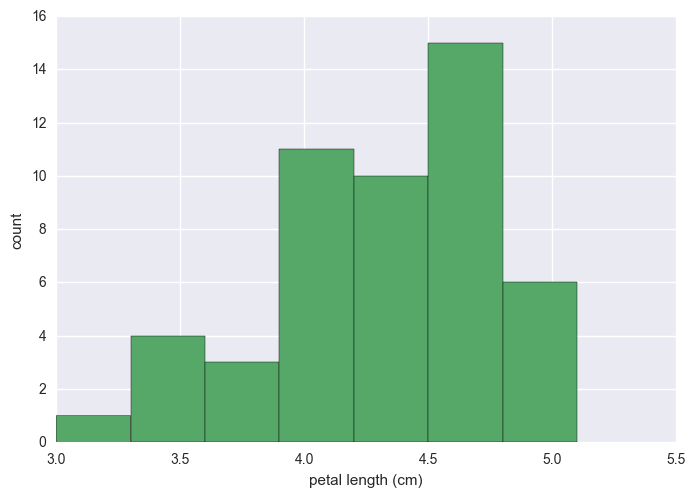

In [83]:
plt.show()

### Bee Swarm Plots

In [85]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [86]:
_ = sns.swarmplot(x=df["species"], y=df["petal_length"])
_ = plt.xlabel("Species")
_ = plt.ylabel("Petal Length (cm)")

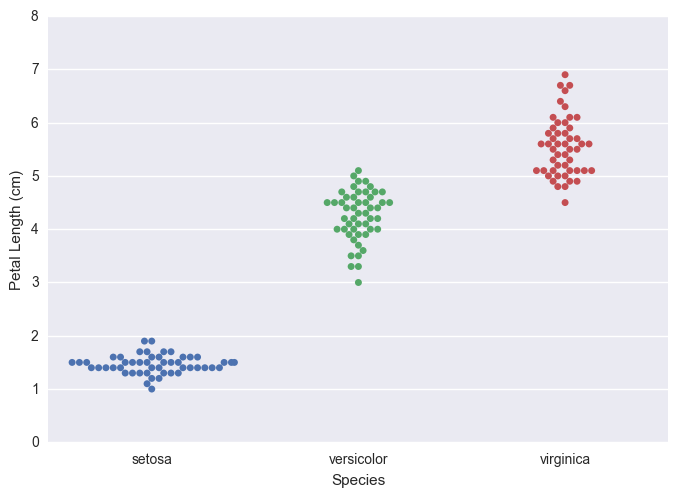

In [87]:
plt.show()

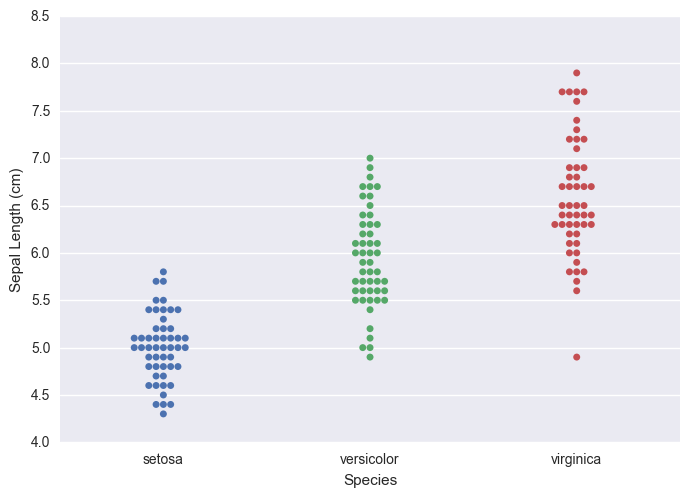

In [88]:
_ = sns.swarmplot(x=df["species"], y=df["sepal_length"])
_ = plt.xlabel("Species")
_ = plt.ylabel("Sepal Length (cm)")
plt.show()

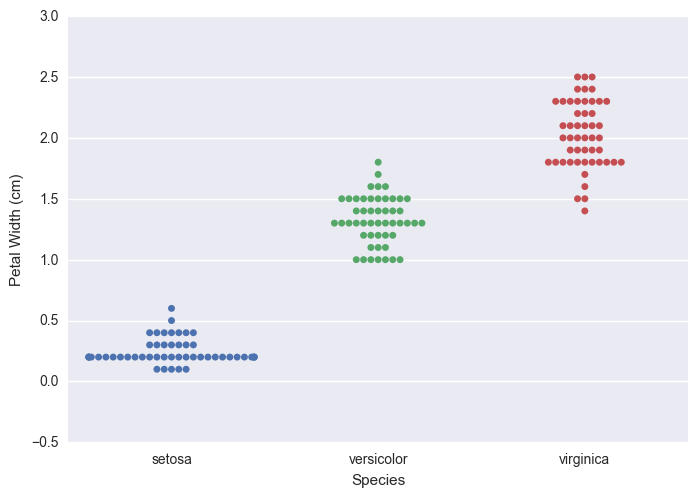

In [89]:
_ = sns.swarmplot(x=df["species"], y=df["petal_width"])
_ = plt.xlabel("Species")
_ = plt.ylabel("Petal Width (cm)")
plt.show()

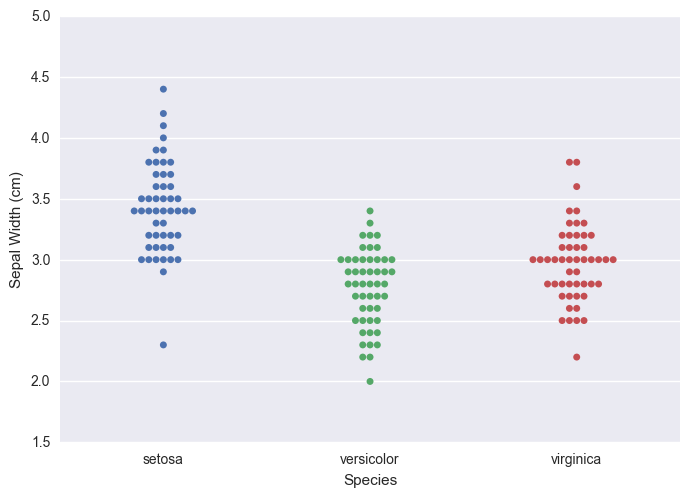

In [90]:
_ = sns.swarmplot(x=df["species"], y=df["sepal_width"])
_ = plt.xlabel("Species")
_ = plt.ylabel("Sepal Width (cm)")
plt.show()

### Empirical CDF

In [102]:
np.arange(1,21)/float(20)

array([ 0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,  0.45,
        0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,  0.9 ,
        0.95,  1.  ])

In [96]:
np.arange(1.0,10.0)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [105]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1,n+1)/float(n)
    

    return x, y

In [106]:
ecdf(range(6))

(array([0, 1, 2, 3, 4, 5]),
 array([ 0.16666667,  0.33333333,  0.5       ,  0.66666667,  0.83333333,  1.        ]))

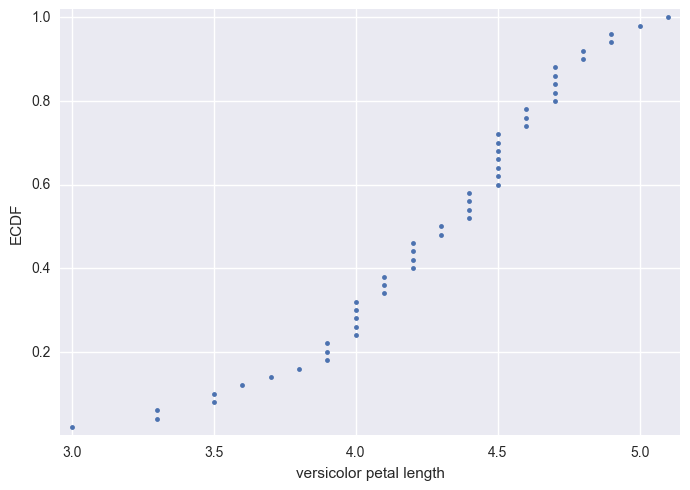

In [114]:
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(versicolor_petal_length)

# Generate plot
_ = plt.plot(x_vers,y_vers, marker = ".", linestyle = 'none')

# Make the margins nice
_ = plt.margins(0.02)

# Label the axes
_ = plt.xlabel("versicolor petal length")
_ = plt.ylabel("ECDF")



# Display the plot
plt.show()


In [109]:
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [110]:
setosa_petal_length = df[df["species"]=="setosa"]["petal_length"]
virginica_petal_length = df[df["species"]=="virginica"]["petal_length"]

In [112]:
# Compute ECDFs
x_set,y_set = ecdf(setosa_petal_length)
x_vers,y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)

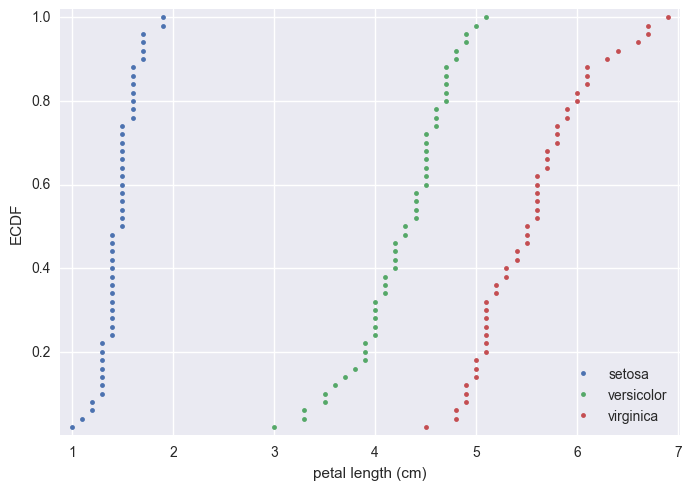

In [113]:
# Plot all ECDFs on the same plot
_ = plt.plot(x_set,y_set,marker=".",linestyle = 'none')
_ = plt.plot(x_vers,y_vers,marker = ".", linestyle = 'none')
_ = plt.plot(x_virg, y_virg,marker = ".", linestyle = 'none')





# Make nice margins
plt.margins(0.02)

# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()